# Instalação das bibliotécas

In [3]:
#Importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import pandas as pd

# Etiqueta que codifica os recursos categóricos
from sklearn.preprocessing import LabelEncoder

#Importar a biblioteca para criação de gráficos
from matplotlib import pyplot as plt
import seaborn as sns

# Importando as bibliotecas necessárias para alteração dos dados categóricos e numéricos
from sklearn.preprocessing import LabelEncoder

#Ferramenta para padronizar os valores
from sklearn.preprocessing import StandardScaler

#Importa a ferramenta para dividir os dados em treino e teste
from sklearn.model_selection import train_test_split

#Importa o modelo para realizar previsão
from sklearn.linear_model import LogisticRegression #Regressão logística
from sklearn import tree #Arvores de decisão
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier #Diversas
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#Importa as ferramentas para avaliação do modelo
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Carregar arquivo

In [4]:
dados_osteo = pd.read_csv('/content/osteoporosis.csv')
#Usa biblioteca pandas para abrir arquivo que contem os dados a serem analisados
#Fonte dos dados: https://www.kaggle.com/datasets/amitvkulkarni/lifestyle-factors-influencing-osteoporosis

# Análise dos dados

In [5]:
dados_osteo.head()
#Verificar se o arquivo a ser analisado esta correto. Podendo ser visualizado os dados iniciais

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [6]:
dados_osteo.info()
#Verifica se há dados faltantes e dtype dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [7]:
dados_osteo.isna().sum()
#Verificar e contar dados nulos em todas em alguma coluna.

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [8]:
dados_osteo.duplicated().sum()
#Identificar se há linhas duplicadas

0

In [9]:
dados_osteo.describe(include='all')
#Verificar concentração dos dados e/ ou discrepantes

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
count,1.958000e+03,1958.000000,1958,1958,1958,1958,1958,1958,1958,1958,1958,970,1311,973,1958,1958.000000
unique,NaN,NaN,2,2,2,3,2,2,2,2,2,1,2,1,2,NaN
top,NaN,NaN,Male,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,Hyperthyroidism,Corticosteroids,Yes,NaN
freq,NaN,NaN,992,981,998,681,1027,1004,1011,1021,982,970,678,973,983,NaN
mean,1.549929e+06,39.101124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,2.614250e+05,21.355424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500128
min,1.100064e+06,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1.319163e+06,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,1.546028e+06,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,1.775870e+06,53.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


# Pré-processamento

In [10]:
dados_osteo = dados_osteo.drop("Id",axis=1)
#Exclui a coluna de 'ID' por não apresentar dados uteis a partir desse momento

In [11]:
dados_osteo['Alcohol Consumption'].unique()
#Mostra quais são as caracteristicas presentes na coluna desejada

array(['Moderate', nan], dtype=object)

In [12]:
dados_osteo['Medical Conditions'].unique()
#Mostra quais são as caracteristicas presentes na coluna desejada

array(['Rheumatoid Arthritis', nan, 'Hyperthyroidism'], dtype=object)

In [13]:
dados_osteo['Medications'].unique()
#Mostra quais são as caracteristicas presentes na coluna desejada

array(['Corticosteroids', nan], dtype=object)

In [14]:
dados_osteo['Alcohol Consumption'] = dados_osteo['Alcohol Consumption'].fillna('Not provided')
dados_osteo['Medical Conditions'] = dados_osteo['Medical Conditions'].fillna('Not provided')
dados_osteo['Medications'] = dados_osteo['Medications'].fillna('Not provided')
#Substitui os valores nulos da coluna 'Alcohol Consumption', 'Medical Conditions' e 'Medications' por Not provided

In [15]:
cols = ['Gender','Hormonal Changes','Family History','Race/Ethnicity','Body Weight','Calcium Intake','Vitamin D Intake','Physical Activity','Medications', 'Smoking','Alcohol Consumption','Medical Conditions','Prior Fractures']

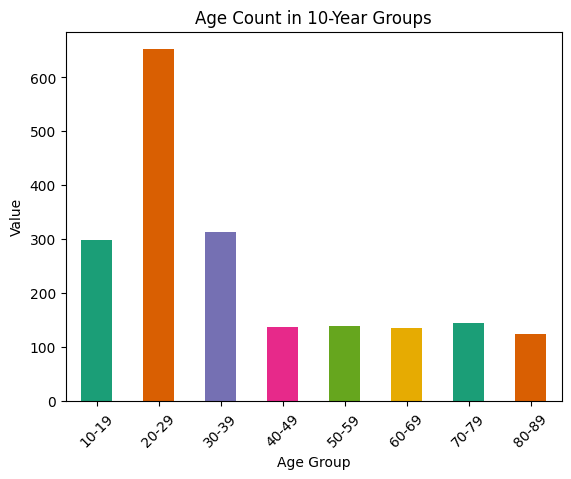

In [16]:
#Gráfico da faixa etária
#Cria um novo dataframe somente a coluna 'Age'
dados_osteo_idade = dados_osteo['Age']
dados_osteo_idade = pd.DataFrame(dados_osteo_idade)

# Criar grupos de idade
bins = range(10, 91, 10)  # Intervalos de 10 em 10 anos de 10 a 90
labels = [f'{i}-{i+9}' for i in bins[:-1]]
dados_osteo_idade['grupo_idade'] = pd.cut(dados_osteo_idade['Age'], bins=bins, labels=labels, right=False)

# Contar frequências
contagem_grupos = dados_osteo_idade['grupo_idade'].value_counts().sort_index()

# Plotar o gráfico
contagem_grupos.plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Age Count in 10-Year Groups')
plt.xlabel('Age Group')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

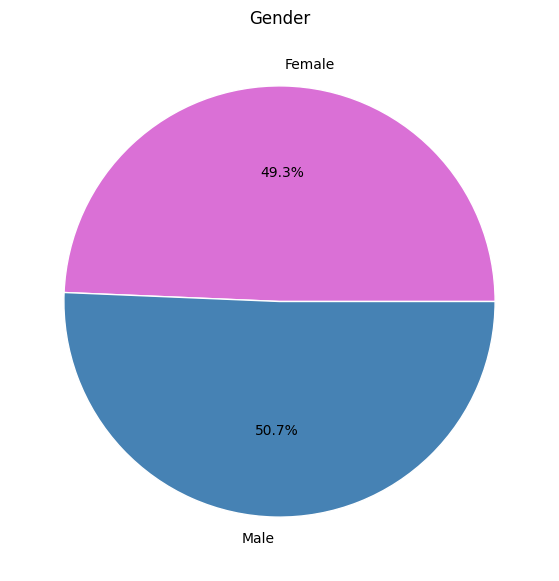

In [17]:
#Gráfico de sexo
#Agrupa os dados pela coluna 'Gender' e constroi um gráfico para identificar o genero na amostra
dados_agrupados = dados_osteo.groupby('Gender').size()
cores = ['orchid', 'steelblue']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Gender')
plt.axis('off')
plt.show()

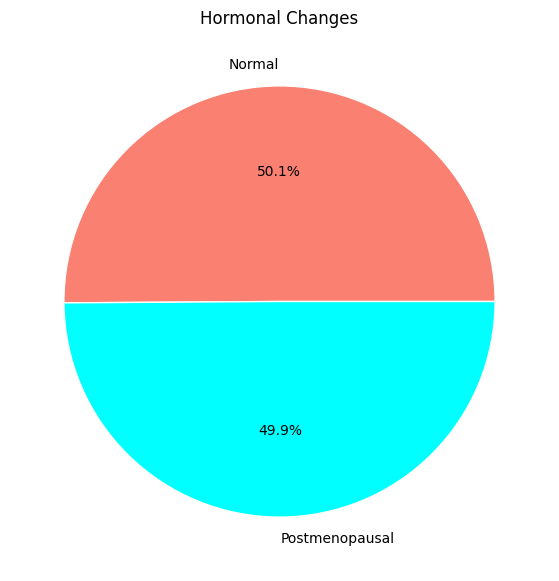

In [18]:
#Agrupa os dados pela coluna 'Hormonal Changes' e constroi um gráfico para identificar se houve mudanças hormonal
dados_agrupados = dados_osteo.groupby('Hormonal Changes').size()
cores = ['salmon', 'aqua']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Hormonal Changes')
plt.axis('off')
plt.show()

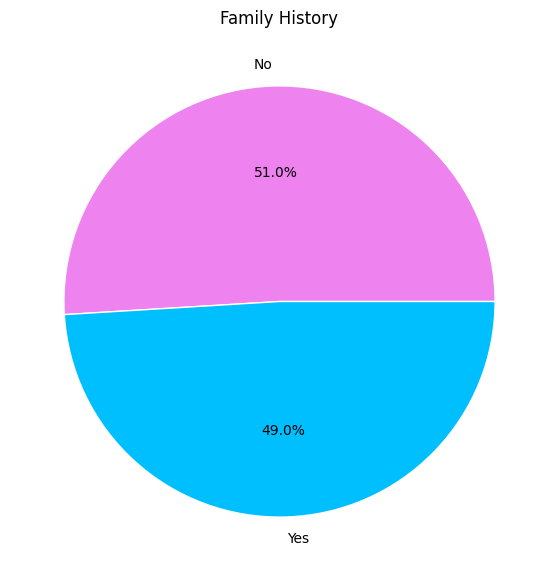

In [19]:
#Agrupa os dados pela coluna 'Family History' e constroi um gráfico para identificar se há histórico familiar
dados_agrupados = dados_osteo.groupby('Family History').size()
cores = ['violet', 'deepskyblue']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Family History')
plt.axis('off')
plt.show()

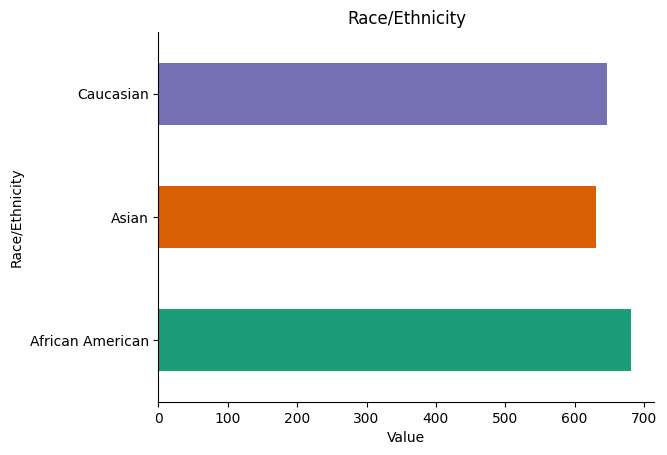

In [20]:
#Agrupa os dados pela coluna 'Hormonal Changes' e constroi um gráfico para identificar as raças identificadas na amostra
dados_osteo.groupby('Race/Ethnicity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Race/Ethnicity')
plt.xlabel('Value')
plt.ylabel('Race/Ethnicity')
plt.show()

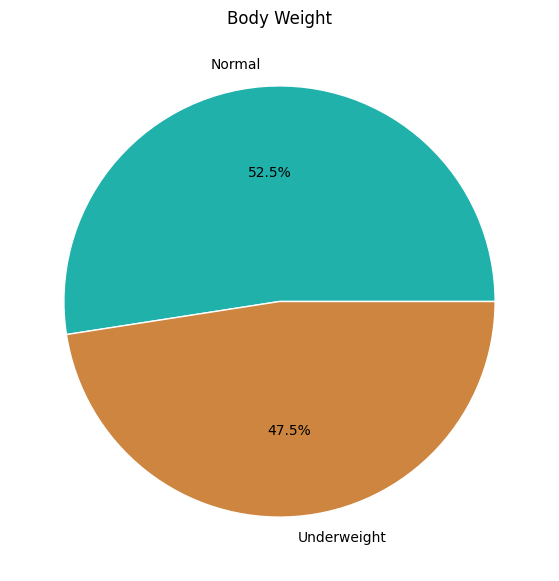

In [21]:
#Agrupa os dados pela coluna 'Body Weight' e constroi um gráfico para identificar o estatus do peso corpório do paciente na amostra
dados_agrupados = dados_osteo.groupby('Body Weight').size()
cores = ['lightseagreen', 'peru']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Body Weight')
plt.axis('off')
plt.show()

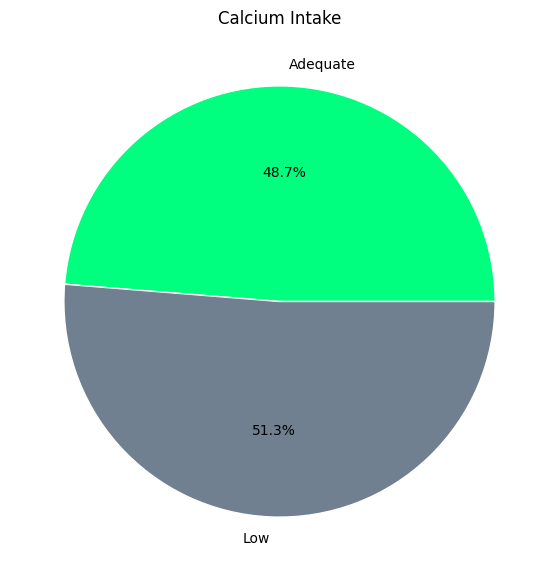

In [22]:
#Agrupa os dados pela coluna 'Calcium Intake' e constroi um gráfico para identificar se a ingestão de cálcio é adequado
dados_agrupados = dados_osteo.groupby('Calcium Intake').size()
cores = ['springgreen', 'slategray']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Calcium Intake')
plt.axis('off')
plt.show()

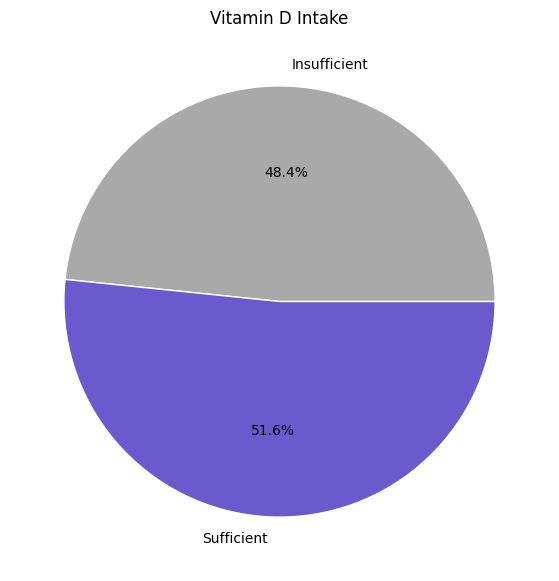

In [23]:
#Agrupa os dados pela coluna 'Vitamin D Intake' e constroi um gráfico para identificar se a ingestão de vitamina D é adequado
dados_agrupados = dados_osteo.groupby('Vitamin D Intake').size()
cores = ['darkgray', 'slateblue']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Vitamin D Intake')
plt.axis('off')
plt.show()

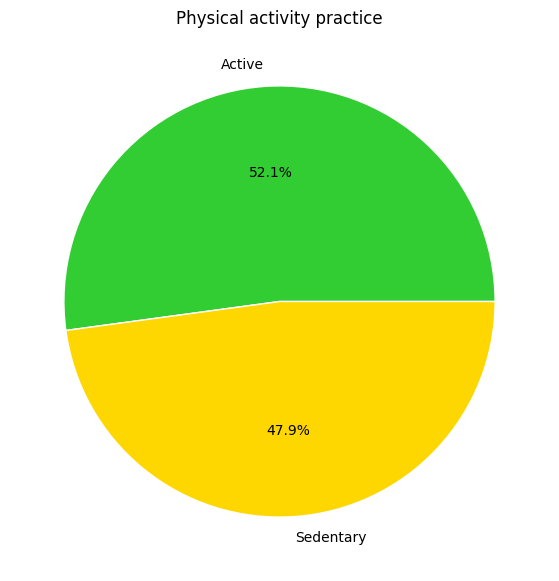

In [24]:
#Agrupa os dados pela coluna 'Physical Activity' e constroi um gráfico para identificar se realiza atividade física
dados_agrupados = dados_osteo.groupby('Physical Activity').size()
cores = ['limegreen', 'gold']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Physical activity practice')
plt.axis('off')
plt.show()

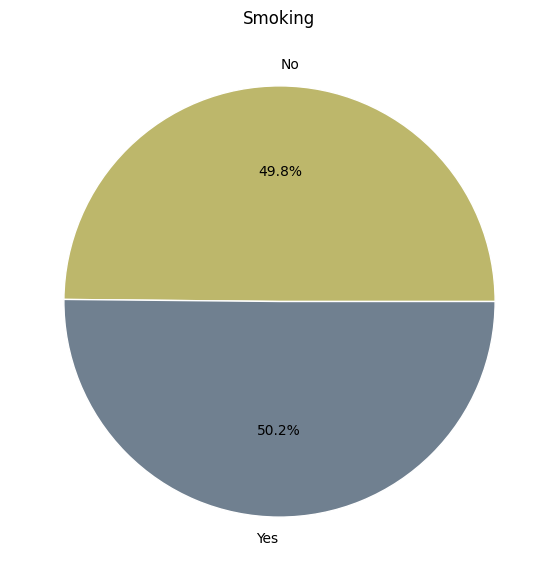

In [25]:
#Agrupa os dados pela coluna 'Smoking' e constroi um gráfico para identificar se realiza atividade física
dados_agrupados = dados_osteo.groupby('Smoking').size()
cores = ['darkkhaki', 'slategray']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Smoking')
plt.axis('off')
plt.show()

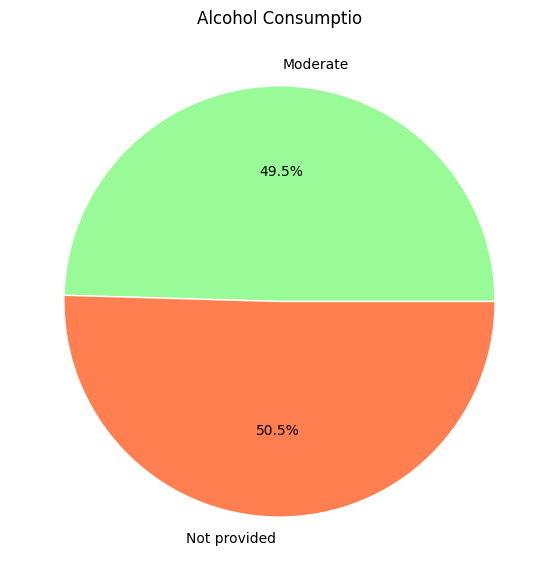

In [26]:
#Agrupa os dados pela coluna 'Alcohol Consumption' e constroi um gráfico para identificar se faz consumo de alcool
dados_agrupados = dados_osteo.groupby('Alcohol Consumption').size()
cores = ['palegreen', 'coral']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Alcohol Consumptio')
plt.axis('off')
plt.show()

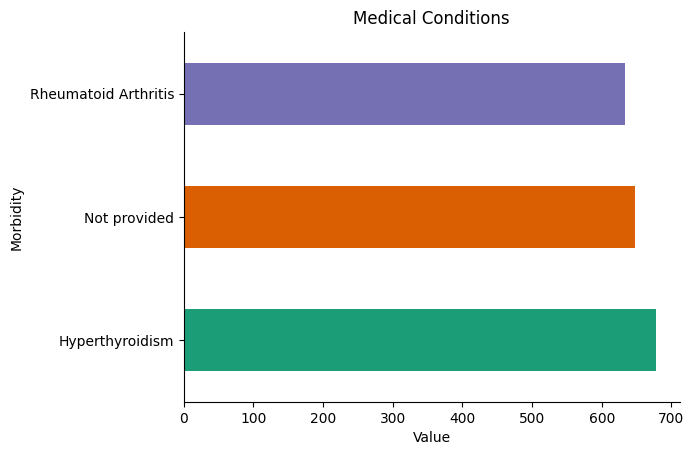

In [27]:
#Agrupa os dados pela coluna 'Medical Conditions' e constroi um gráfico para identificar as condições médicas
dados_agrupados = dados_osteo.groupby('Medical Conditions').size()
cores = sns.color_palette('Set2', len(dados_agrupados))

dados_osteo.groupby('Medical Conditions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Medical Conditions')
plt.xlabel('Value')
plt.ylabel('Morbidity')
plt.show()

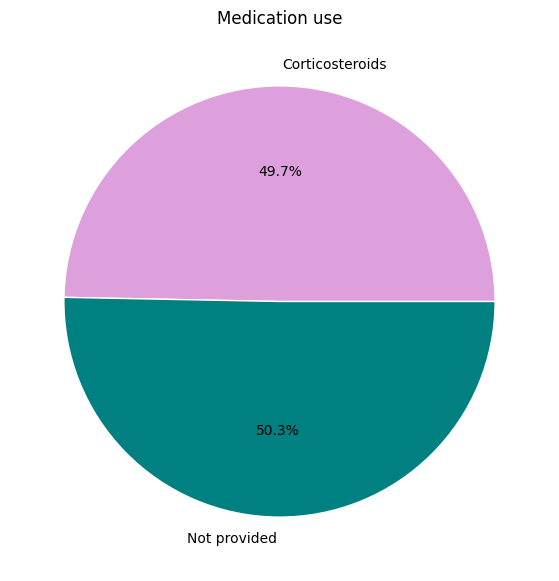

In [28]:
#Agrupa os dados pela coluna 'Medications' e constroi um gráfico para identificar se faz uso de medicação
dados_agrupados = dados_osteo.groupby('Medications').size()
cores = ['plum', 'teal']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Medication use')
plt.axis('off')
plt.show()

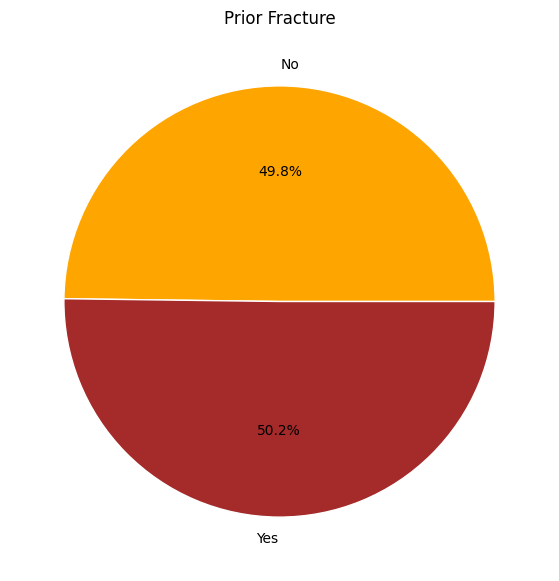

In [29]:
#Agrupa os dados pela coluna 'Prior Fractures' e constroi um gráfico para identificar se já teve fraturas prévias
dados_agrupados = dados_osteo.groupby('Prior Fractures').size()
cores = ['orange', 'brown']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Prior Fracture')
plt.axis('off')
plt.show()

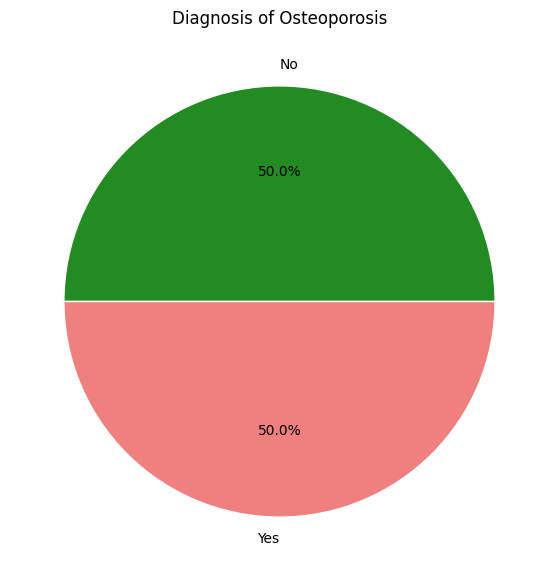

In [30]:
#Cria uma copia só da coluna 'Osteoporosis'
copia_dados = dados_osteo.copy()
copia_dados = pd.DataFrame(copia_dados)

#Altera as caracteristicas da coluna copiada para No e Yes
copia_dados['Osteoporosis'] = copia_dados['Osteoporosis'].replace(0, 'No')
copia_dados['Osteoporosis'] = copia_dados['Osteoporosis'].replace(1, 'Yes')

#Agrupa os dados pela coluna 'Osteoporosis' e constroi um gráfico para identificar se teve o diagnóstico de Osteoporose
dados_agrupados = copia_dados.groupby('Osteoporosis').size()
cores = ['forestgreen', 'lightcoral']

plt.figure(figsize=(10, 7))
plt.pie(dados_agrupados, labels=dados_agrupados.index, autopct='%1.1f%%', colors=cores, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Diagnosis of Osteoporosis')
plt.axis('off')
plt.show()

<ipython-input-31-d31aeea1b9e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(copia_dados,x="Osteoporosis", palette=cores)


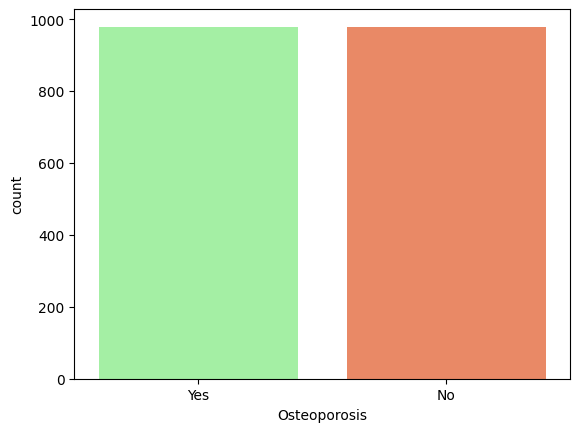

In [31]:
#Grafico para número de pessoas na amostra com diagnóstico de Osteoporose
cores = ['palegreen', 'coral']
sns.countplot(copia_dados,x="Osteoporosis", palette=cores)
plt.show()

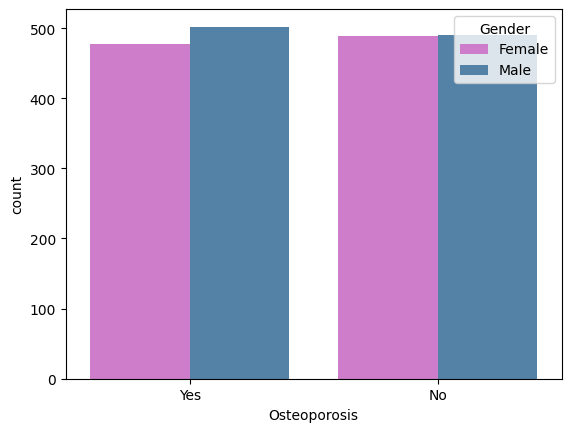

In [32]:
#Grafico para número de pessoas na amostra com diagnóstico de Osteoporose por genero
cores = ['orchid', 'steelblue']
sns.countplot(copia_dados,x="Osteoporosis",hue="Gender", palette=cores)
plt.show()

In [33]:
#Cria uma tupla com o nome das colunas categóricas
colunas_categoricas = ('Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking',
                       'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures')


In [34]:
#Cria uma copia do dataframe
dados_categoricos = dados_osteo

In [35]:
#Cria uma função que ia transformar os dados categóricos em numéricos usando a função recém criada
def trans_categoricos(coluna):
  dados_categoricos[coluna] = le.fit_transform(dados_categoricos[coluna])

In [36]:
# Usa o Label Encoder para transformar rótulos categóricos em númericos.
le = LabelEncoder()
for mudar_dados in colunas_categoricas:
  trans_categoricos(mudar_dados)

In [37]:
#Mostrar alterações realizadas até o momento no dataframe
dados_categoricos.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1


<Axes: >

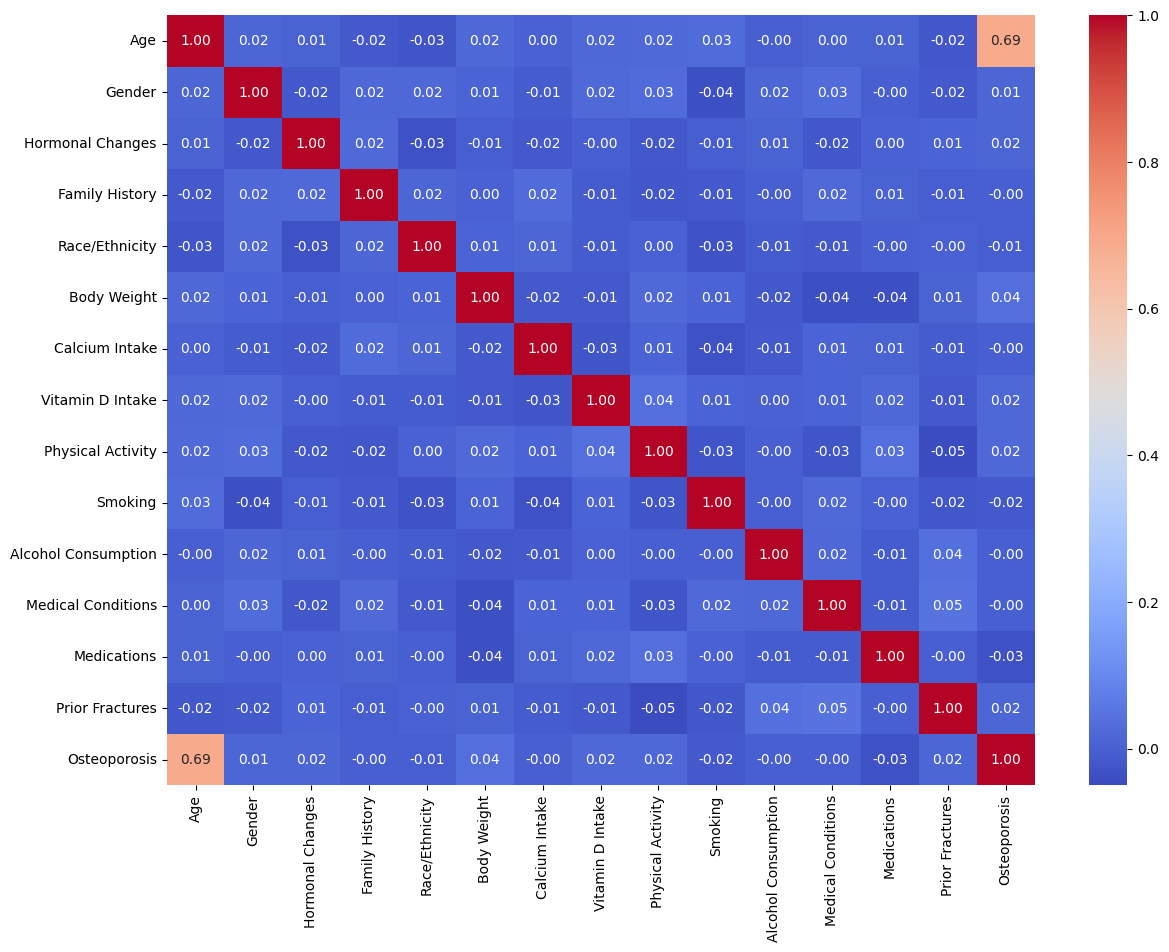

In [38]:
# Calcular a matriz de correlação
correlation_matrix = dados_categoricos.corr(method='pearson')

# Criar o heatmap de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Modelagem e Desenvolvimento

In [39]:
# Separar os dados em fatores preditores e previsores (X e Y)
X = dados_categoricos.drop("Osteoporosis",axis=1)
y = dados_categoricos["Osteoporosis"]

In [40]:
#Separa os dados de treino e teste
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [41]:
#Usa o modelo de regressão logísticas para realizar previsões
reg = LogisticRegression()
reg.fit(X_train,y_train)
regpred = reg.predict(X_test)

#Imprime a Acurácia de modelo
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       192
           1       0.87      0.81      0.83       200

    accuracy                           0.84       392
   macro avg       0.84      0.84      0.84       392
weighted avg       0.84      0.84      0.84       392

Accuracy of Logistic Regression is :  83.6734693877551


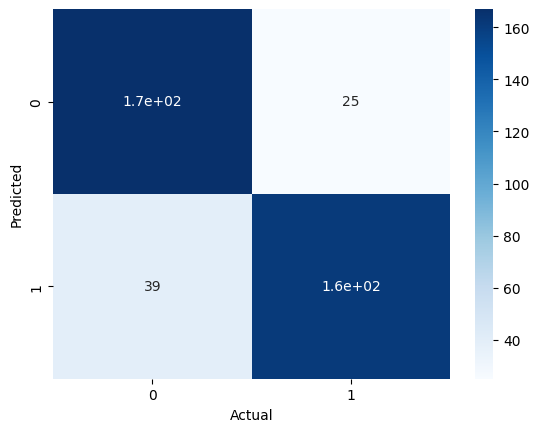

In [42]:
#Calcula a matriz de confusão entre os valores reais (y_test) e os valores preditos (regpred).
sns.heatmap(confusion_matrix(y_test,regpred),annot=True,cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [43]:
#Usa o modelo de árvore de descisão para realizar previsões
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dpred = dtree.predict(X_test)

#Imprime a Acurácia de modelo
print(classification_report(y_test,dpred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dpred)*100)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       192
           1       0.83      0.86      0.84       200

    accuracy                           0.84       392
   macro avg       0.84      0.84      0.84       392
weighted avg       0.84      0.84      0.84       392

Accuracy of Decision Tree is :  83.6734693877551


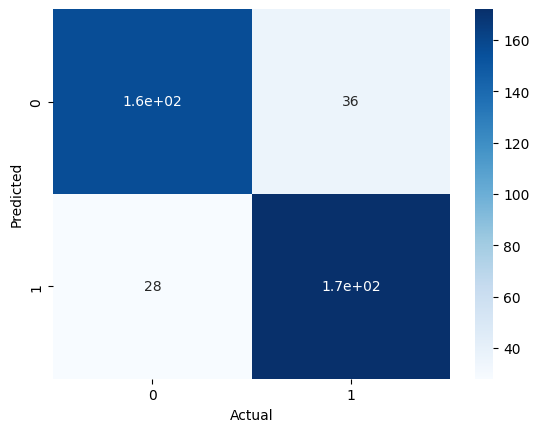

In [44]:
#Calcula a matriz de confusão entre os valores reais (y_test) e os valores preditos (dpred).
sns.heatmap(confusion_matrix(y_test,dpred),annot=True,cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [45]:
#Calcula a matriz de confusão entre os valores reais (y_test) e os valores preditos (rfpred).
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rfpred = rf.predict(X_test)

#Imprime a Acurácia de modelo
print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is : ",accuracy_score(y_test,rfpred)*100)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       192
           1       0.95      0.79      0.86       200

    accuracy                           0.87       392
   macro avg       0.88      0.87      0.87       392
weighted avg       0.88      0.87      0.87       392

Accuracy of Random Forest is :  86.98979591836735


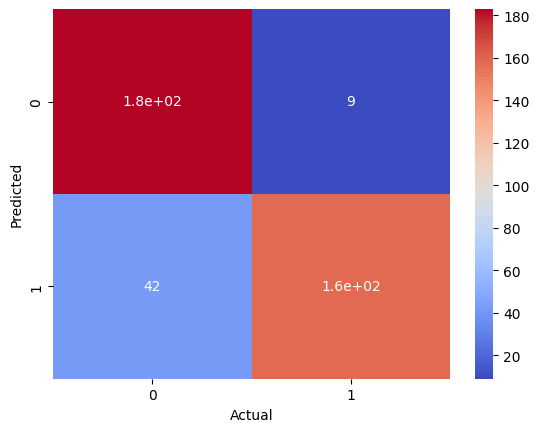

In [46]:
#Calcula a matriz de confusão entre os valores reais (y_test) e os valores preditos (rfpred).
sns.heatmap(confusion_matrix(y_test,rfpred),annot=True,cmap="coolwarm")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [58]:
#Calcula a matriz de confusão entre os valores reais (y_test) e os valores preditos (svcpred).
svc = SVC()
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)

#Imprime a Acurácia de modelo
print(classification_report(y_test,svcpred))
print("Accuracy of SVC is : ",accuracy_score(y_test,svcpred)*100)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       192
           1       0.94      0.75      0.84       200

    accuracy                           0.85       392
   macro avg       0.86      0.85      0.85       392
weighted avg       0.87      0.85      0.85       392

Accuracy of SVC is :  84.94897959183673


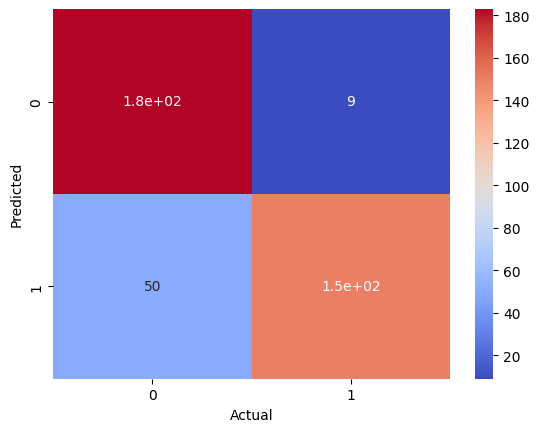

In [63]:
#Calcula a matriz de confusão entre os valores reais (y_test) e os valores preditos (svcpred).
sns.heatmap(confusion_matrix(y_test,svcpred),annot=True,cmap="coolwarm")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [62]:
#Calcula a matriz de confusão entre os valores reais (y_test) e os valores preditos (gbcpred).
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbcpred = gbc.predict(X_test)

#Imprime a Acurácia de modelo
print(classification_report(y_test, gbcpred))
print("Accuracy of Gradient Boosting Classifier is : ",accuracy_score(y_test,gbcpred)*100)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       192
           1       1.00      0.84      0.92       200

    accuracy                           0.92       392
   macro avg       0.93      0.92      0.92       392
weighted avg       0.93      0.92      0.92       392

Accuracy of Gradient Boosting Classifier is :  92.09183673469387


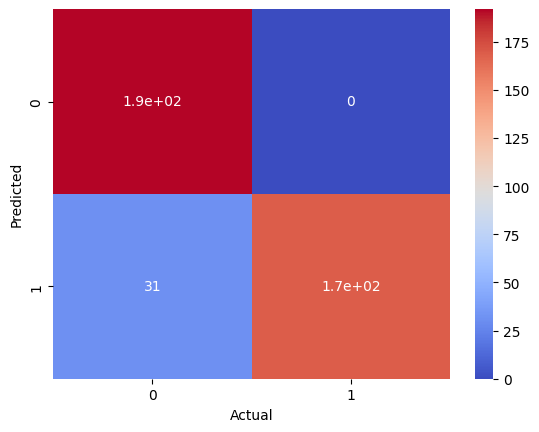

In [66]:
#Calcula a matriz de confusão entre os valores reais (y_test) e os valores preditos (gbcpred).
sns.heatmap(confusion_matrix(y_test,gbcpred),annot=True,cmap="coolwarm")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [68]:
#Calcula a matriz de confusão entre os valores reais (y_test) e os valores preditos (abcpred).
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
abcpred = abc.predict(X_test)

#Imprime a Acurácia de modelo
print(classification_report(y_test, abcpred))
print("Accuracy of Gradient Boosting Classifier is : ",accuracy_score(y_test, abcpred)*100)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       192
           1       1.00      0.81      0.90       200

    accuracy                           0.90       392
   macro avg       0.92      0.91      0.90       392
weighted avg       0.92      0.90      0.90       392

Accuracy of Gradient Boosting Classifier is :  90.3061224489796


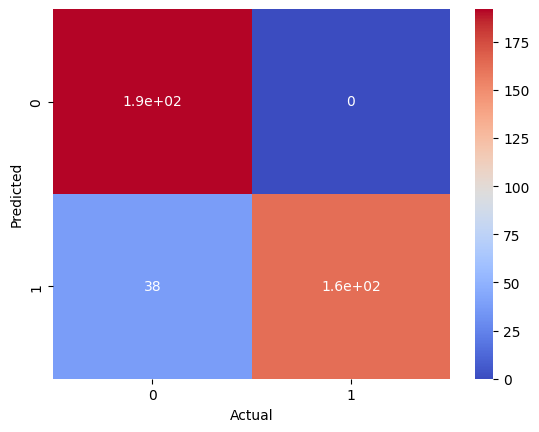

In [67]:
#Calcula a matriz de confusão entre os valores reais (y_test) e os valores preditos (abcpred).
sns.heatmap(confusion_matrix(y_test,abcpred),annot=True,cmap="coolwarm")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
KNN

In [50]:
# Definição dos modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "MLP Classifier": MLPClassifier(),
    "Sequential": Sequential([Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),Dense(32, activation='relu'),Dense(1, activation='sigmoid')])
}

# Treine e avalie cada modelo
for name, model in models.items():
    if (name == "Sequential"):
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)
        _, accuracy = model.evaluate(X_test_scaled, y_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
    print(f"-{name} Accuracy: {accuracy * 100:.2f}%")

-Logistic Regression Accuracy: 83.67%
-Decision Tree Accuracy: 83.16%
-Support Vector Classifier Accuracy: 84.95%
-Gradient Boosting Classifier Accuracy: 92.09%
-Random Forest Classifier Accuracy: 86.48%
-AdaBoost Classifier Accuracy: 90.31%
-K-Nearest Neighbors Accuracy: 88.52%
-MLP Classifier Accuracy: 81.89%
Epoch 1/10
40/40 [==============================] - 3s 10ms/step - loss: 0.6008 - accuracy: 0.6941 - val_loss: 0.5185 - val_accuracy: 0.8185
Epoch 2/10
40/40 [==============================] - 0s 10ms/step - loss: 0.4691 - accuracy: 0.8043 - val_loss: 0.4321 - val_accuracy: 0.8408
Epoch 3/10
40/40 [==============================] - 0s 7ms/step - loss: 0.4009 - accuracy: 0.8291 - val_loss: 0.3932 - val_accuracy: 0.8344
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.3711 - accuracy: 0.8450 - val_loss: 0.3812 - val_accuracy: 0.8408
Epoch 5/10
40/40 [==============================] - 0s 7ms/step - loss: 0.3524 - accuracy: 0.8379 - val_loss: 0.3737 - val_ac